In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
from mpl_toolkits.mplot3d import Axes3D


# a

In [2]:
date_parser = lambda dates: parser.parse(dates, dayfirst=True)
# date_parser = lambda dates: pd.datetime.strptime(dates, "%d-%m-%Y")
data_time  = pd.read_csv("SP500_weekly_Jan1988_Nov2018.csv",parse_dates = ["Date"], 
                         index_col='Date', date_parser=date_parser)

In [3]:
def plot_close(datas):
    plt.figure(figsize= (30,10))
    for data in datas:
        plt.plot(data)
    plt.grid()
    

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


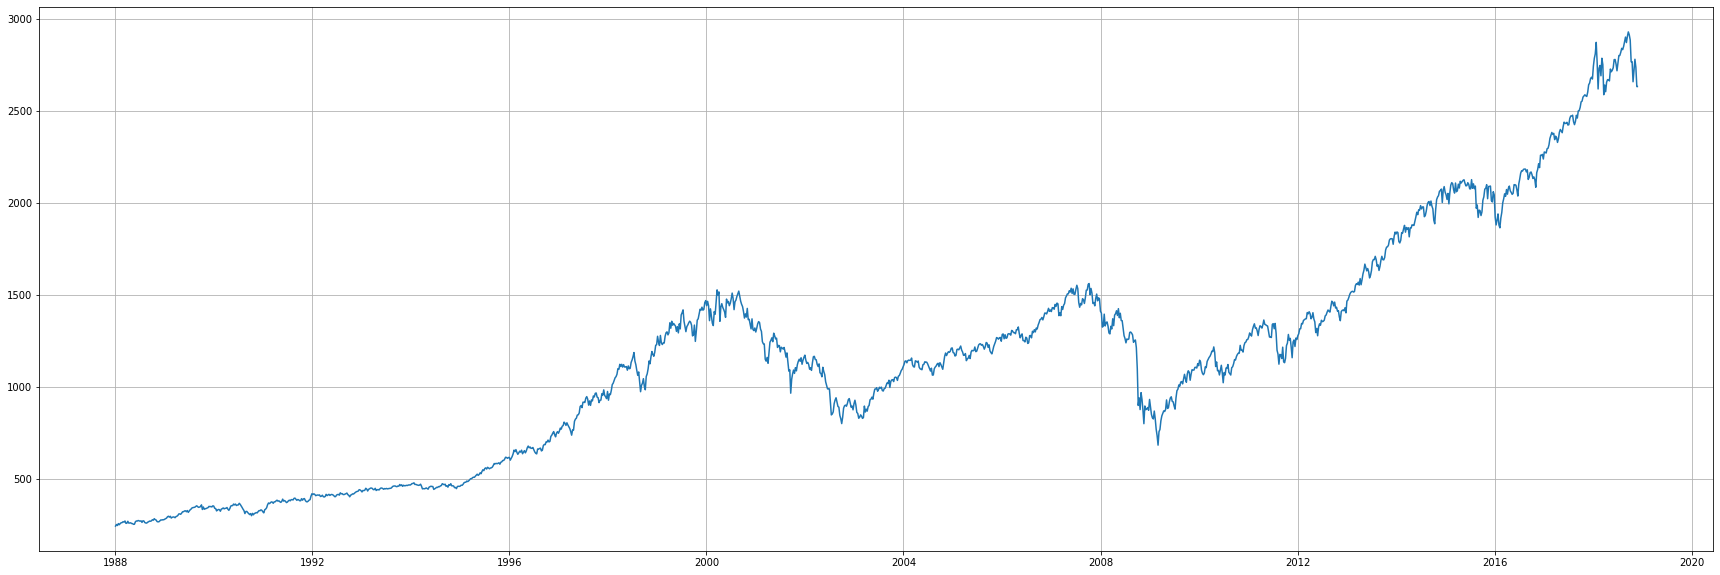

In [4]:
plot_close([data_time])

# b

In [5]:
data = pd.read_csv("SP500_weekly_Jan1988_Nov2018.csv")
data.index = data.index + 1
data = data["Adj Close"]


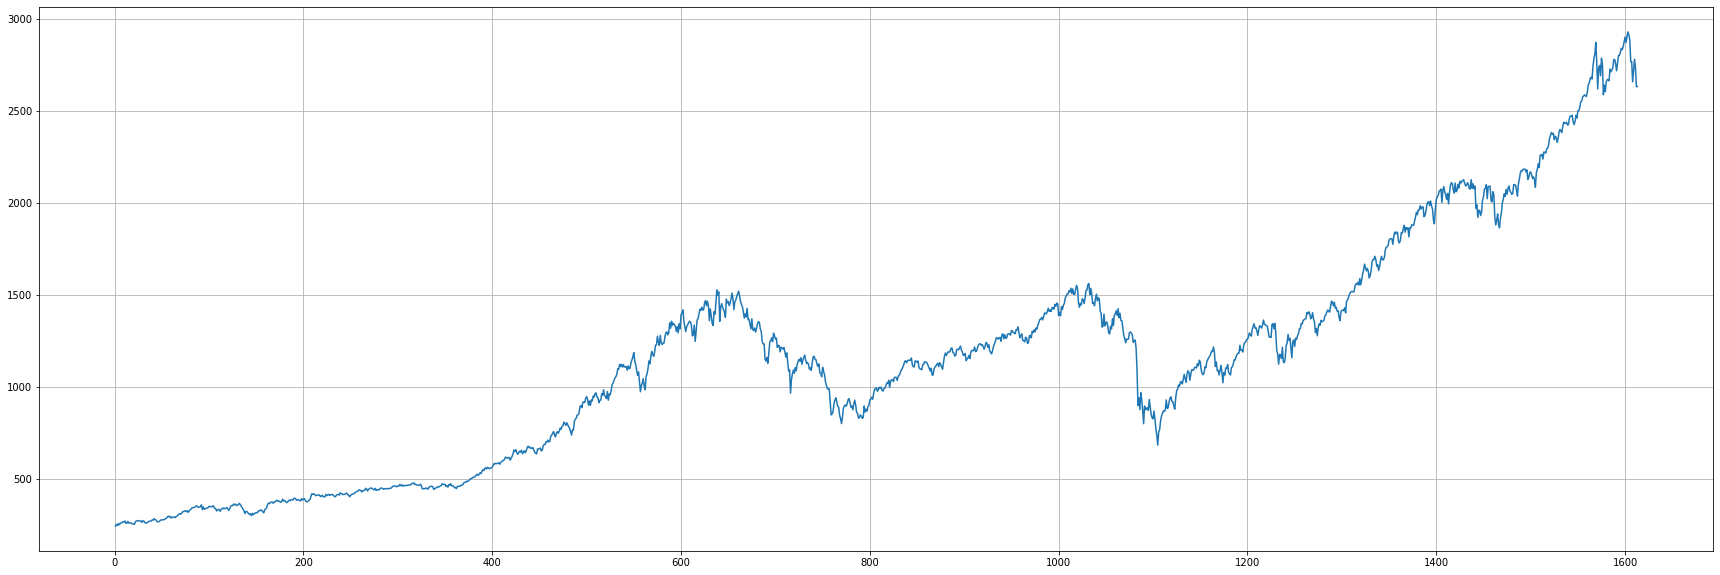

In [6]:
plot_close([data])

In [7]:
# def naive_drift(time_series,length):
#     """Naice forecast with drift
#     Allow the forecasts to increase or decrease over time, 
#     where the amount of change over time (called the drift) 
#     is set to be the average change seen in the historical data. 
    
#     Arg:
#         time_series: (pandas.Series)
#         length: (int)  
#     return:
#         s: (pandas.Series)
#     """
    
#     if length <= len(time_series):
#         y_init = time_series[1]
#         y_t = time_series[len(time_series) - length] # y1513

#         ts_changed = []

#         for i in range(length):
#             T = len(time_series) - length + i + 1
#             y_t = y_t + 1 * ((y_t - y_init) / (T - 1))
#             ts_changed.append(y_t)

#         s = pd.concat([time_series[:-length], pd.Series(ts_changed)])
#         s.index = range(1,len(s)+1)
#         return s
#     else:
#         print("")
        
        
        
def naive_drift(time_series):
    """Naice forecast with drift
    Allow the forecasts to increase or decrease over time, 
    where the amount of change over time (called the drift) 
    is set to be the average change seen in the historical data. 
    
    Arg:
        time_series: (pandas.Series)
        fore_len: (int)  
    return:
        s: (pandas.Series)
    """
    y_init = time_series[1]
    h = 1
    
    ts_changed = []

    for i in range(1, len(time_series)+1):
        T = i
        y_t = time_series[i]
        ts_changed.append(y_t + h * ((y_t - y_init) / (T - 1)))

    return pd.Series(ts_changed, index=np.arange(2,len(time_series)+2))

In [8]:
drift = naive_drift(data)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
data

1        243.399994
2        252.050003
3        246.500000
4        257.070007
5        250.960007
6        257.630005
7        261.609985
8        262.459991
9        267.299988
10       264.940002
11       271.119995
12       258.510010
13       258.890015
14       269.429993
15       259.769989
16       260.140015
17       261.329987
18       257.480011
19       256.779999
20       253.020004
21       253.419998
22       266.450012
23       271.260010
24       270.679993
25       273.779999
26       271.779999
27       270.019989
28       272.049988
29       263.500000
30       272.019989
           ...     
1584    2727.719971
1585    2712.969971
1586    2721.330078
1587    2734.620117
1588    2779.030029
1589    2779.659912
1590    2754.879883
1591    2718.370117
1592    2759.820068
1593    2801.310059
1594    2801.830078
1595    2818.820068
1596    2840.350098
1597    2833.280029
1598    2850.129883
1599    2874.689941
1600    2901.520020
1601    2871.679932
1602    2904.979980


In [10]:
drift

2               NaN
3        260.700012
4        248.050003
5        261.626678
6        252.850010
7        260.476007
8        264.644983
9        265.182848
10       270.287487
11       267.333336
12       273.891995
13       259.883648
14       260.180850
15       271.432301
16       260.939274
17       261.256016
18       262.450612
19       258.308247
20       257.523333
21       253.526320
22       253.920998
23       267.547632
24       272.526374
25       271.866080
26       275.045833
27       272.915199
28       271.043835
29       273.111099
30       264.217857
31       273.006885
           ...     
1585    2729.289346
1586    2714.529043
1587    2722.893441
1588    2736.190874
1589    2780.627779
1590    2781.257053
1591    2756.460424
1592    2719.926702
1593    2761.401727
1594    2802.916786
1595    2803.436123
1596    2820.435764
1597    2841.978280
1598    2834.902761
1599    2851.762150
1600    2876.336555
1601    2903.182384
1602    2873.322607
1603    2906.642428


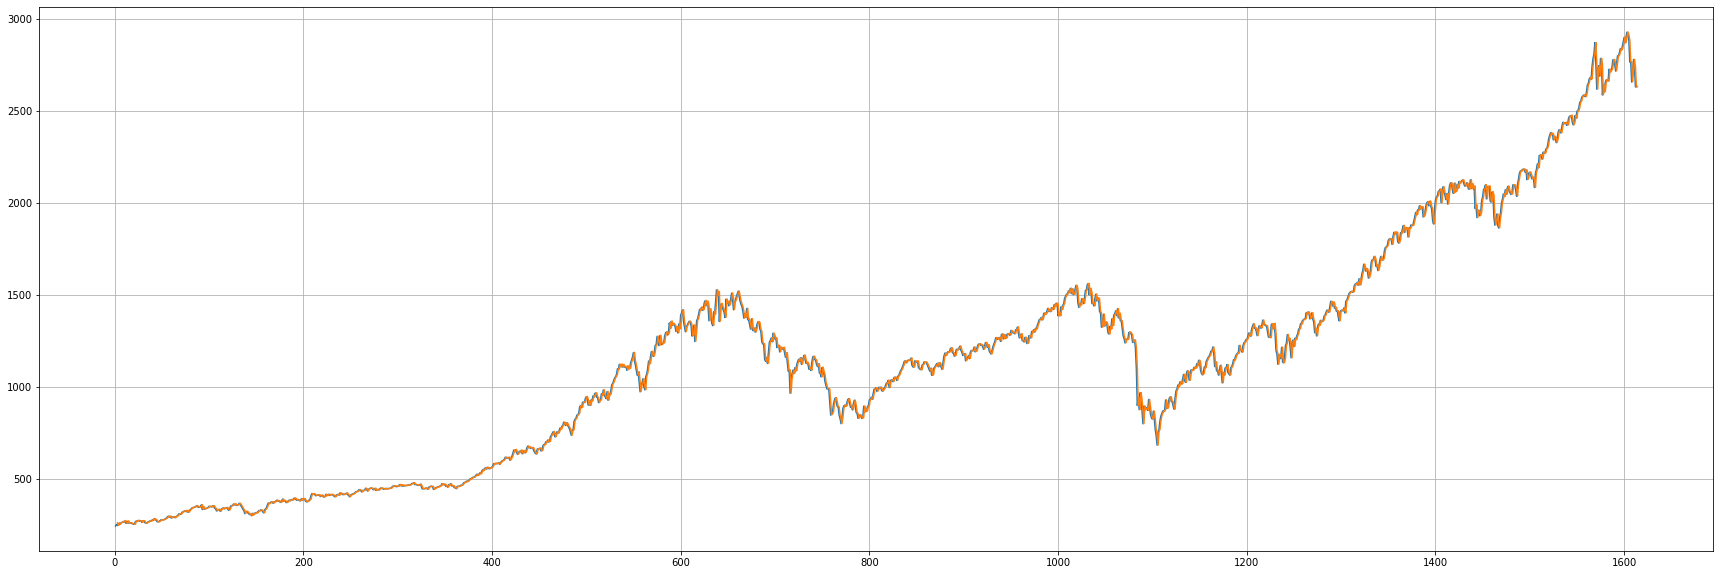

In [11]:
plot_close([data, drift])

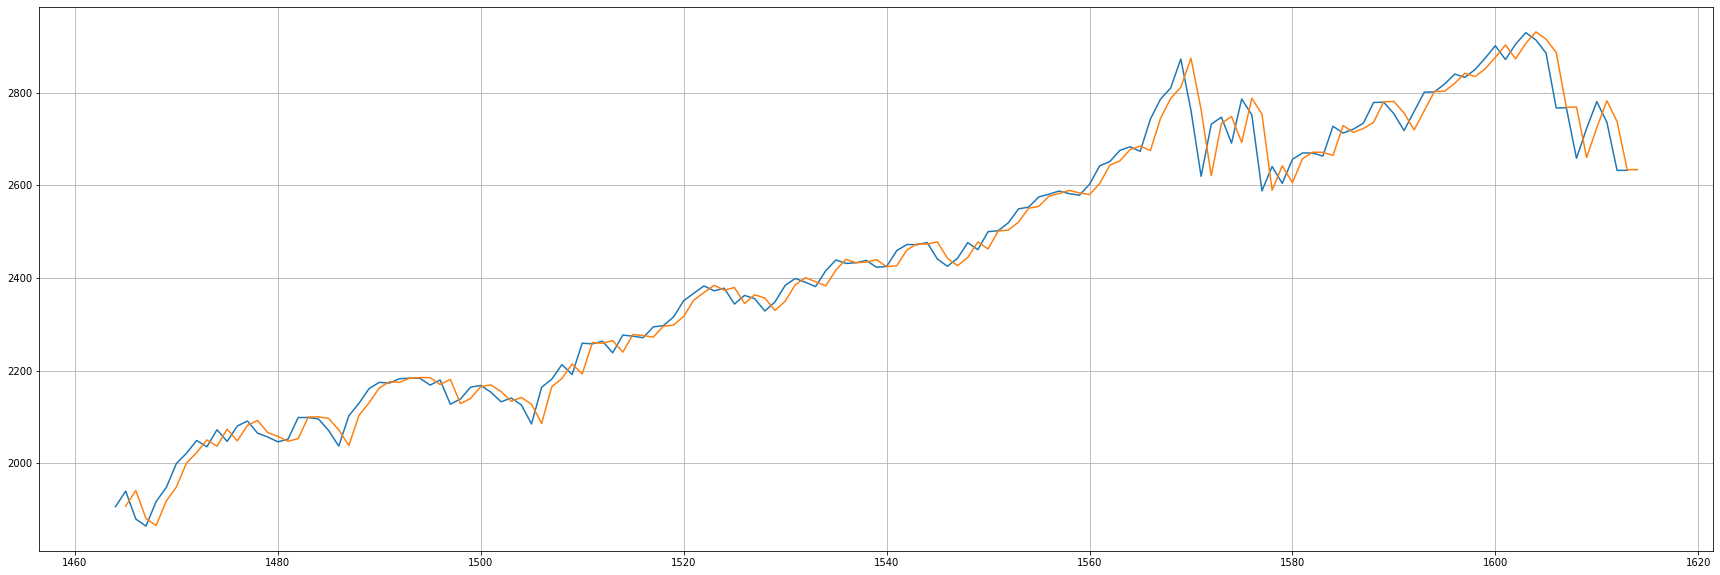

In [12]:
plot_close([data[-150:], drift[-150:]])

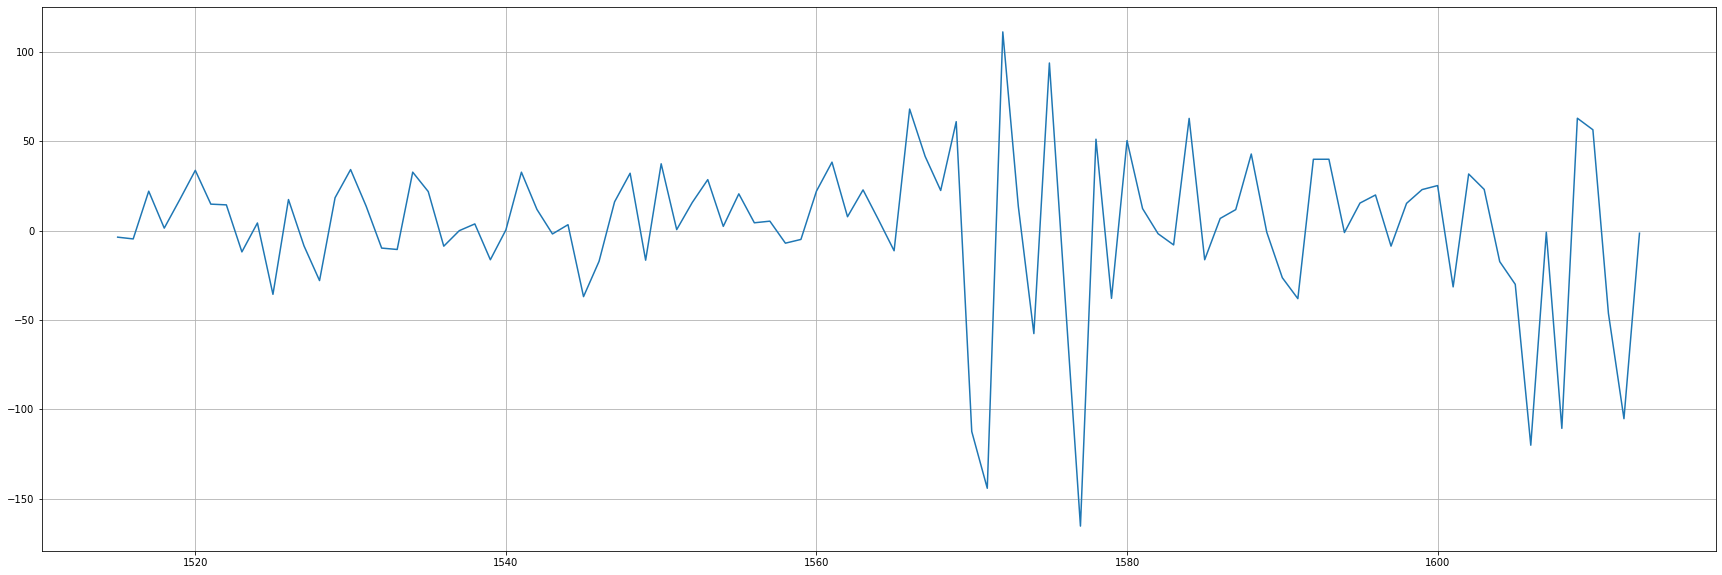

In [13]:
plot_close([(data - drift)[-100:]])

In [14]:
def rmse(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = [(y_true[i] - y_pred[i]) for i in range(len(y_true))]
    diff =  np.array(diff)[~np.isnan(diff)]
    mse = 0
    for i in range(len(diff)):
        mse += diff[i] ** 2
    return np.sqrt(mse/len(diff))


# def rmse(YT, Y_hat):
#     YT,Y_hat= np.array(YT),np.array(Y_hat)
#     return np.sqrt(np.mean((YT - Y_hat)**2))



def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
mean_absolute_percentage_error(data[1514:1613], drift[1514:1613])

0.05797776084897798

In [20]:
rmse(data[1514:1613], drift[1514:1613])

1.5104559990061037

# c

In [ ]:
def cma_n(ts,n):
    """
    """
    
    result = []
    if n % 2 == 0:
        for index in np.arange( n , len(ts)-n ):
#        print(index)
            sums = 0.5*(ts[index - n] + ts[index + n]) + ts[index - (n-1):index+n].sum() 
            mean = sums / 2 / n
            result.append(mean)
        
    nan = [np.nan]*n
    result = nan+result+nan
    return result

In [ ]:
data.index = range(0, len(data))

#smoothed = pd.Series(cma_n(data,4), index = range(1, len(data)+1))
smoothed = pd.Series(data.rolling(2).mean().rolling(4).mean(), index = range(1, len(data)+1))

In [ ]:
plot_close([data, smoothed])

In [ ]:
plot_close([data - smoothed])

# d

In [ ]:
def returns(ts):
    """
    """
    r = []
    for i in range(len(ts)-1):
        temp = np.log(ts[i+1] / ts[i]) 
        r.append(temp)
    return pd.Series(r,index = range(1, len(r)+1))

In [ ]:
data.index = range(0, len(data))
return_data = returns(data)

In [ ]:
plot_close([return_data])

# e

In [ ]:
def sse(x, y):
    return np.sum(np.power(x - y,2))

def sse_plot(sse):
    """
    """
    plt.figure()
    plt.plot(sse)
    plt.title("SSE for one step smoothing")
    plt.ylabel("SSE")
    plt.xlabel("Alpha")
    plt.xticks(np.linspace(0, 100, 11), ["{0:1.1f}".format(x) for x in np.linspace(0,1,11)])

def alpha_grid_search(train):
    sse_one = []
    alphas = np.arange(0.01,1,0.01)
    for i in alphas:
        smoothed = train.ewm(alpha = i, adjust=False).mean()
        sse_one.append(sse(smoothed[:-1], train.values[1:]))
        
    sse_plot(sse_one)
    
    optimal_alpha_one = alphas[np.argmin(sse_one)]
    print("Optimal Alpha for 1-step forecast is {0}".format(optimal_alpha_one))
    
    return optimal_alpha_one

# def ses_forecast(train, a, test):
#     """
#     """
#     smoothed = train.ewm(alpha=a, adjust=False).mean()

#     l_last = smoothed[len(smoothed)-1]
#     y_t = train[len(train)-1]
    
#     return pd.Series([a * y_t + (1 - a) * l_last] * len(test), index=test.index)
    
def ses_forecast(data, a, length):
    smoothed = data.ewm(alpha=a, adjust=False).mean()
    return smoothed[-length:]

In [ ]:
train = data[:-100]
test = data[-100:]

alpha = alpha_grid_search(train)

forecast = ses_forecast(data, alpha, length=len(test))

In [ ]:
plot_close([test,forecast])

In [ ]:
plot_close([test - forecast])

In [ ]:
mean_absolute_percentage_error(test, forecast)

# f

In [ ]:
return_square = return_data ** 2
train = return_square[:-100]
test = return_square[-100:]

In [ ]:
alpha = alpha_grid_search(train)

forecast = ses_forecast(return_square, alpha, length=len(test))

In [ ]:
plot_close([test,forecast])

In [ ]:
plot_close([test - forecast])

In [ ]:
# mean_absolute_percentage_error(test, forecast)

# h

In [ ]:
def holt(y, alpha, beta, length):
    """
    
    """
    
#    l = [ y[:12].mean() ]
    l = [y[0]]
#    b = [ (sum(y[12:24])-sum(y[:12]))/144 ]
    b = [y[1] - y[0]]

    holtsmoothed = []
    
    Y = y.tolist()
    
    for i in range(len(Y) + length): 
        if i == len(Y) - 1:
            Y.append(l[-1] + b[-1])
            
        l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i]))
        b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
        holtsmoothed.append(l[i] + b[i])
    
    return holtsmoothed

def sse_plot_3d(sse_one, alpha, beta):
    """
    """
    
    fig=plt.figure(figsize= (30,30))
    ax=Axes3D(fig)
    X,Y=np.meshgrid(np.arange(0.01,1,0.01),np.arange(0.01,1,0.01))
    Z = np.array(sse_one).reshape((99,99))
    ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
    
    x1 = alpha
    y1 = beta
    z1 = Z[int(alpha * 100)-1, int(beta * 100)-1]
    ax.scatter(x1,y1,z1,c='r',marker="v")


def paras_grid_search(train):
    """
    """
    
    sse_one = []
    for alpha in np.arange(0.01,1,0.01):        
        for beta in np.arange(0.01,1,0.01):
            smoothed = holt(train,alpha,beta,length=0)
            temp_sse = sse(smoothed[1:], train.values[1:])
            sse_one.append(temp_sse)
        
    
    
    alpha = (np.argmin(sse_one) / 99 + 1) * 0.01
    beta = (np.argmin(sse_one) % 99 + 1) * 0.01
    
    sse_plot_3d(sse_one, alpha, beta)
    
    print("Optimal Alpha for 1-step forecast is {0}".format(alpha))
    print("Optimal Beta for 1-step forecast is {0}".format(beta))
    
    return alpha, beta
    


## e

In [ ]:
train = data[:-100]
test = data[-100:]
alpha, beta = paras_grid_search(train)
forecast = pd.Series(holt(train, alpha, beta, len(test)), index = data.index)

In [ ]:
plot_close([data, forecast])

In [ ]:
plot_close([data - forecast])

In [ ]:
plot_close([data[-len(test):], forecast[-len(test):]])

In [ ]:
plot_close([data[-len(test):] - forecast[-len(test):]])

In [ ]:
mean_absolute_percentage_error(test, forecast[-len(test):])

## f

In [ ]:
return_square.index = range(len(return_square))

In [ ]:
train = return_square[:-100]
test = return_square[-100:]

alpha, beta = paras_grid_search(train)
forecast = pd.Series(holt(train, alpha, beta, len(test)), index=return_square.index)

In [ ]:
plot_close([return_square, forecast])

In [ ]:
plot_close([return_square - forecast])

In [ ]:
plot_close([return_square[-len(test):], forecast[-len(test):]])

In [ ]:
plot_close([return_square[-len(test):] - forecast[-len(test):]])

In [ ]:
# mean_absolute_percentage_error(test, forecast[-len(test):])